# Edgeworth Box

The Edgeworth box is a fundamental concept taught to undergraduate economics students studying microeconomic theory. 

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### The Model
Consider a small, simple open economy with two firms, that produces two goods.

1. Apple MacBooks
2. Ford Broncos (100% Electric)  

#### Production Functions
We model the production functions for each of these goods to be in the form of Cobb Douglas production functions that are homogeneous of degree 1 (HOD 1). This would imply that the production process for each of them exhibit constant returns to scale (CRS).
<br><center>$F(K_A, L_A) = {K^\alpha}{L^{1-\alpha}}$</center>

<center>$G(K_B, L_B) = {K^\beta}{L^{1-\beta}}$</center>

For each firm the ratio resource input is defined using the superscripted parameters ( $\alpha, \beta$ ). These parameters are constrained to: ${0 \leq \alpha, \beta \leq 1}$

In [163]:
Alpha = 0.6
Beta = 0.4

def F(K, L, alpha=Alpha):
    return (K**alpha) * (L**(1-alpha))

def G(K, L, beta=Beta):
    return (K**beta) * (L**(1-beta))

#### Constraints

In our simple economy each firm operates within the bounds of two resource constraints: 
<br><br><center>$\bar{K} = Capital_{Maximum}$</center>
<center>$\bar{L} = Labor_{Maximum}$</center>

These resource constraints are the aggregation between both firms capital and labor resources.
<br><br><center>$\bar{L} = L_A + L_B$</center>
<center>$\bar{K} = K_A + K_B$</center>

We can define the level of resources utilized by Ford, by simply rearranging the resource constraints define above.
<br><br><center>$L_B = \bar{L} - L_A$</center> 
<center>$K_B = \bar{K} - K_A$</center> 

Using the same logic, we can do the same for Apple.
<br><br><center>$L_A = \bar{L} - L_B$</center> 
<center>$K_A = \bar{K} - K_B$</center> 

In [164]:
K_Bar = 100
L_Bar = 100

#### Profit Maximization
In our model, both producers seek to maximize their profits:
<br><br><center>$\max\limits_{K_A, L_A}  F(K_A, L_A)-wL_A-rK_A$</center>

<center>$\max\limits_{K_B, L_B}  F(K_B, L_B)-wL_B-rK_B$</center>

### Solve the Model
We use the first order conditions (FOCs) for each firm to find:

#### Marginal Products for Apple

When we re-arrange the FOC, we identify the Marginal products for Apple.

$MP_{K_A} = w = G_K(\bar{K} - K_B, \bar{L} - L_B) = {\alpha}{(\bar{K} - K_B)^{\alpha-1}}{(\bar{L} - L_B)^{1-\alpha}}$

$MP_{K_A} = r = G_L(\bar{K} - K_B, \bar{L} - L_B)= ({1 - \alpha})({\bar{K} - K_B)^{\alpha}}({\bar{L} - L_B)^{-\alpha}}$



#### Marginal Products for Ford

When we re-arrange the FOC, we identify the Marginal products for Ford.

$MP_{K_B} = w=F_K(K_B, L_B) = {\beta}{K^{\beta-1}}{L^{1-\beta}}$

$MP_{L_B} = r=F_L(K_B, L_B) = ({1 - \beta}){K^{\beta}}{L^{1-\beta}}$


#### Marginal Rate of Technical Substitution

The marginal rate of technical substitution is defined as the rate at which labor can be exchanged for capital. Using this logic, we can rearrange the marginal products for each firm to identify the marginal rate of technical substitution for each.

<br><center>$MRTS_A = \frac{w}{r}=\frac{G_K(\bar{K} - K_A, \bar{L} - L_A)}{G_L(\bar{K} - K_A, \bar{L} - L_A)} = \frac {{\alpha}{(\bar{K} - K_B)^{\alpha-1}}{(\bar{L} - L_B)^{1-\alpha}}}{({1 - \alpha})({\bar{K} - K_B)^{\alpha}}({\bar{L} - L_B)^{-\alpha}}} = \frac {({1 - \alpha})}{\alpha} \frac {{(\bar{K} - K_B)}} {{(\bar{L} - L_B)}}$</center>
<br><center>$MRTS_B = \frac{w}{r}=\frac{F_K(K_B, L_B)}{F_L(K_B, L_B)} = \frac {{\beta}{K^{\beta-1}}{L^{1-\beta}}} {({1 - \beta}){K^{\beta}}{L^{1-\beta}}} = \frac {(1-\beta)}{\beta} \frac {K_B}{L_B}$</center>

In [165]:
def marginal_rate_of_technical_subsititution(labor_allocation=None, capital_allocation=None, beta=Beta):
    ''''''
    return ((1-beta)/beta)*(capital_allocation/labor_allocation)

#### Solve
Pareto Effeciency implies that the MRTS for both firms are equal for both firms. The Edgeworth box will allow for a visual representation of the isoquants that intersect at the Pareto efficient allocation of K and L.

#### Efficienct Allocation Condition
We set the two Marginal Rate of Technical Subsitutions equal which defines the effecient allocation condition.

<br><center>$\frac {({1 - \alpha})}{\alpha} \frac {{(\bar{K} - K_B)}} {{(\bar{L} - L_B)}} = \frac {w}{r} = \frac {(1-\beta)}{\beta} \frac {K_B}{L_B}$</center>

#### Efficiency Curve
We re-arrage the efficient allocation condition to get Ford's capital allocation as a function of any given labor allocation.

<center>$ K_B(L_B) = \frac {L_B \cdot \bar{K}} {\frac {\beta (1-\alpha)}{\alpha (1-\beta)} (\bar{L}-L_B)+L_B}$</center>

In [275]:
def efficiency_curve(labor_allocation=None,
                     K=None, 
                     L=None, 
                     alpha=Alpha, 
                     beta=Beta):
    ''''''
    A = (1-beta) * alpha
    B = (1-alpha) * beta
    numerator = labor_allocation*K
    denominator = ((B/A)*(L-labor_allocation)) + labor_allocation
    return numerator / denominator

def isoquant_curve(vector, quantity, param):
    return (quantity / (vector**(1-param)))**(1/param)

In [276]:
def solve(labor_allocation, K=K_Bar, L=L_Bar, alpha=Alpha, beta=Beta):
    capital_allocation = efficiency_curve(labor_allocation, K, L)
    RTS = round(marginal_rate_of_technical_subsititution(labor_allocation, capital_allocation), 2)
    q_macbooks = round(F(K-capital_allocation, L-labor_allocation), 2)
    q_broncos = round(G(capital_allocation, labor_allocation), 2)
    return round(capital_allocation, 2), q_macbooks, q_broncos, RTS

#### Edgeworth Box


In [273]:
def edgeworth_box(labor_allocation, K=K_Bar, L=L_Bar, alpha=Alpha, beta=Beta):
    capital_allocation, q_macbooks, q_broncos, RTS = solve(labor_allocation)
    fig, ax = plt.subplots(figsize=(9,7))
    ax.set_xlim(0, L)
    ax.set_ylim(0, K)
    ax.plot(labor_allocation, capital_allocation,'k-')
    labor_vector = np.arange(1, L)
    Apple_Isoquant = isoquant_curve(L-labor_vector, q_macbooks, alpha)
    Ford_Isoquant = isoquant_curve(labor_vector, q_broncos, beta)
    ax.plot(labor_vector, K-Apple_Isoquant,'g-')
    ax.plot(labor_vector, Ford_Isoquant, 'r-')
    ax.plot(labor_allocation, capital_allocation,'o')
    ax.vlines(labor_allocation, 0, capital_allocation, "grey", linestyles="dashed")
    ax.text(-6, capital_allocation-2, r'$K^*$', fontsize=14)
    ax.hlines(capital_allocation, 0, labor_allocation, "grey", linestyles="dashed")
    ax.text(labor_allocation-2, -6, r'$L^*$', fontsize=14)
    ax.text(-12, -12, r'$Output_{Ford}$',fontsize=16)
    ax.text(L, K, r'$Output_{Apple}$',fontsize=16)
    ax.set_xlabel(r'$Labor_{Ford}$', fontsize=16)
    ax.set_ylabel(r'$Capital_{Ford}$', fontsize=16)
    print(f'Effecient Labor = {labor_allocation}\nEffecient Capital = {capital_allocation}\nQuantity of Macbooks = {q_macbooks}\nQuantity of Broncos = {q_broncos}\nMarginal Rate of Technical Subsitution = {RTS}')

Effecient Labor = 50
Effecient Capital = 69.23
Quantity of Macbooks = 37.36
Quantity of Broncos = 56.95
Marginal Rate of Technical Subsitution = 2.08


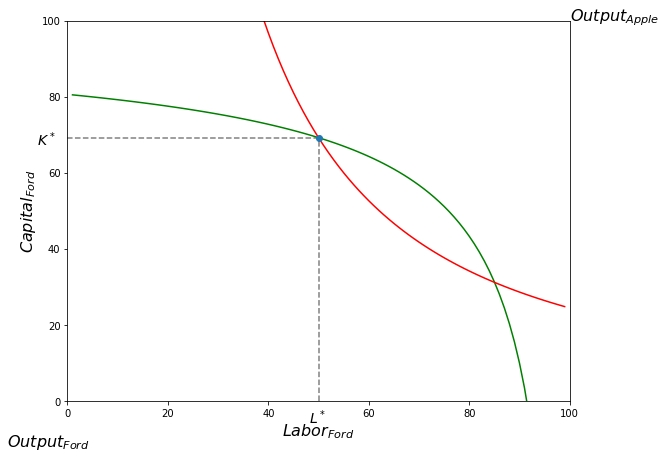

In [274]:
edgeworth_box(50)

### Conclusion